# Basic Boston Celitcs Basketball Research

In [1]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd

In [2]:
from matplotlib import pyplot as plt

import seaborn as sns

In [3]:
url='https://www.basketball-reference.com/teams/BOS/'
response = requests.get(url)
status = response.status_code
if status == 200:
    page = response.text
    soup = bs(page)
else:
    print(f"Oops! Received status code {status}")

In [4]:
print(soup.prettify())
type(soup)

<!DOCTYPE html>
<html class="no-js" data-root="/home/bbr/build" data-version="klecko-" itemscope="" itemtype="https://schema.org/WebSite" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="ie=edge" http-equiv="x-ua-compatible"/>
  <meta content="width=device-width, initial-scale=1.0, maximum-scale=2.0" name="viewport"/>
  <link href="https://d2p3bygnnzw9w3.cloudfront.net/req/202204281" rel="dns-prefetch"/>
  <!-- Quantcast Choice. Consent Manager Tag v2.0 (for TCF 2.0) -->
  <script async="true" type="text/javascript">
   (function() {
	var host = window.location.hostname;
	var element = document.createElement('script');
	var firstScript = document.getElementsByTagName('script')[0];
	var url = 'https://quantcast.mgr.consensu.org'
	    .concat('/choice/', 'XwNYEpNeFfhfr', '/', host, '/choice.js')
	var uspTries = 0;
	var uspTriesLimit = 3;
	element.async = true;
	element.type = 'text/javascript';
	element.src = url;
	
	firstScript.parentNode.insertBefore(element, firstScript);

bs4.BeautifulSoup

### In which of the last 10 years did the Boston Celtics have the best regular season record?

In [5]:
season_stats_list = []    #makes an empty list
stats_table = soup.find(class_='stats_table').tbody         
for row in stats_table.find_all('tr'):
    season = row.find(attrs={'data-stat':'season','scope':'row'}).text
    team_name = row.find(attrs={'data-stat':'team_name'}).text
    wins = row.find(attrs={'data-stat':'wins'}).text
    losses = row.find(attrs={'data-stat':'losses'}).text
    win_loss_pct = row.find(attrs={'data-stat':'win_loss_pct'}).text
    off_rtg = row.find(attrs={'data-stat':'off_rtg'}).text
    def_rtg = row.find(attrs={'data-stat':'def_rtg'}).text
    season_stats_list.append({'season':season,'team_name':team_name,'wins':wins,'losses':losses,
                              'win_loss_pct':win_loss_pct,'off_rtg':off_rtg,'def_rtg':def_rtg})     #adds stuff to the list 
#season_stats_list

seasons_df = pd.DataFrame(season_stats_list)   #makes a dataframe of the l

In [6]:
seasons_df

,season,team_name,wins,losses,win_loss_pct,off_rtg,def_rtg
0,2021-22,Boston Celtics*,51,31,.622,114.4,106.9
1,2020-21,Boston Celtics*,36,36,.500,114.0,112.5
2,2019-20,Boston Celtics*,48,24,.667,113.3,107.0
3,2018-19,Boston Celtics*,49,33,.598,112.2,107.8
4,2017-18,Boston Celtics*,55,27,.671,107.6,103.9
...,...,...,...,...,...,...,...
71,1950-51,Boston Celtics*,39,30,.565,87.3,87.6
72,1949-50,Boston Celtics,22,46,.324,,
73,1948-49,Boston Celtics,25,35,.417,,
74,1947-48,Boston Celtics*,20,28,.417,,


Pulled out a dataframe of every Celtics Season in NBA and ABA hsitory with some major stats included.

In [7]:
last_ten_years = seasons_df.iloc[0:10] #grabs positions 0-10
last_ten_years

,season,team_name,wins,losses,win_loss_pct,off_rtg,def_rtg
0,2021-22,Boston Celtics*,51,31,.622,114.4,106.9
1,2020-21,Boston Celtics*,36,36,.500,114.0,112.5
2,2019-20,Boston Celtics*,48,24,.667,113.3,107.0
3,2018-19,Boston Celtics*,49,33,.598,112.2,107.8
4,2017-18,Boston Celtics*,55,27,.671,107.6,103.9
5,2016-17,Boston Celtics*,53,29,.646,111.2,108.4
6,2015-16,Boston Celtics*,48,34,.585,106.8,103.6
7,2014-15,Boston Celtics*,40,42,.488,104.7,104.5
8,2013-14,Boston Celtics,25,57,.305,102.9,107.7
9,2012-13,Boston Celtics*,41,40,.506,103.1,103.3


Pulled out the last 10 years of Celtics basketball

In [8]:
just_wins_and_season = last_ten_years[['season','wins']]
just_wins_and_season

,season,wins
0,2021-22,51
1,2020-21,36
2,2019-20,48
3,2018-19,49
4,2017-18,55
5,2016-17,53
6,2015-16,48
7,2014-15,40
8,2013-14,25
9,2012-13,41


Took just the season and number of wins that season and made a new dataframe of it

In [9]:
just_wins_and_season.sort_values('wins', ascending=False)

,season,wins
4,2017-18,55
5,2016-17,53
0,2021-22,51
3,2018-19,49
2,2019-20,48
6,2015-16,48
9,2012-13,41
7,2014-15,40
1,2020-21,36
8,2013-14,25


This shows us in a dataframe that over the last 10 years the Celtics won the most games in the 2017-2018 season 
when they won 55 games. We can also see what year they won the least games as it is in order.

In [10]:
just_wins_and_season = just_wins_and_season[['season','wins']]

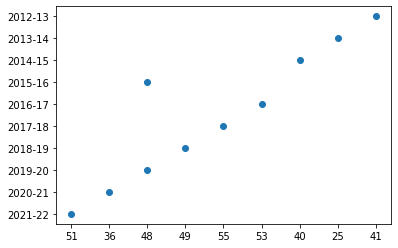

In [11]:
x=just_wins_and_season.wins
y=just_wins_and_season.season
plt.scatter(x,y)

Basic plot that plots the season on Y axis with the wins from that season on the x axis.

In [12]:
sns.set_theme()

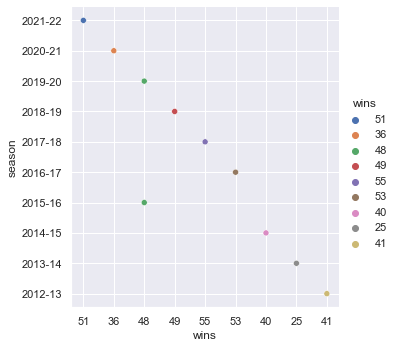

In [13]:
sns.relplot(data=just_wins_and_season, x= 'wins', y='season',hue='wins')  #makes the graph better by giving it titles and a color hue

More in depth plot that plots the season on Y axis with the wins from that season on the x axis.  The wins also have a different color depending on the amount

### What players were on the Boston Celtics end of year 16 man roster in the last five years?

In [14]:
url='https://www.basketball-reference.com/teams/BOS/2022.html'
response = requests.get(url)
status = response.status_code
if status == 200:
    page = response.text
    soup = bs(page)
else:
    print(f"Oops! Received status code {status}")

In [15]:
def get_players(soup):
    player_list = []   #creates an empty list
    stats_table = soup.find(class_='stats_table').tbody            
    rows = stats_table.find_all('tr')
    for row in stats_table.find_all('tr'):
        number = row.find(attrs={'data-stat':'number'}).text
        player = row.find(attrs={'data-stat':'player'}).text         #pulling out data from the html
        pos = row.find(attrs={'data-stat':'pos'}).text
        height = row.find(attrs={'data-stat':'height'}).text
        weight = row.find(attrs={'data-stat':'weight'}).text
        birth_date = row.find(attrs={'data-stat':'birth_date'}).text
        birth_country = row.find(attrs={'data-stat':'birth_country'}).text
        years_experience = row.find(attrs={'data-stat':'years_experience'}).text
        college = row.find(attrs={'data-stat':'college'}).text
        player_list.append({'number':number, 'player':player, 'pos':pos, 'height': height, 'weight':weight, 'birth_date':birth_date, 
                           'birth_country':birth_country, 'years_experience':years_experience, 'college':college})
    return(player_list)          #adds the data pulled to the list

player_df = pd.DataFrame(get_players(soup))
player_df           #prints out a dataframe celtics roster data for the 2022 season


,number,player,pos,height,weight,birth_date,birth_country,years_experience,college
0,12,Grant Williams,PF,6-6,236,"November 30, 1998",us,2,Tennessee
1,0,Jayson Tatum,SF,6-8,210,"March 3, 1998",us,4,Duke
2,36,Marcus Smart,PG,6-3,220,"March 6, 1994",us,7,Oklahoma State
3,11,Payton Pritchard,SG,6-1,195,"January 28, 1998",us,1,Oregon
4,42,Al Horford,C,6-9,240,"June 3, 1986",do,14,Florida
5,7,Jaylen Brown,SF,6-6,223,"October 24, 1996",us,5,California
6,44,Robert Williams,C,6-8,237,"October 17, 1997",us,3,Texas A&M
7,26,Aaron Nesmith,SF,6-5,215,"October 16, 1999",us,1,Vanderbilt
8,9,Derrick White,SG,6-4,190,"July 2, 1994",us,4,"Colorado-Colorado Springs, Colorado"
9,30,Sam Hauser,SF,6-8,215,"December 8, 1997",us,R,"Marquette, Virginia"


A dataframe of the Celtics final 16 man roster and all the other info

In [16]:
def get_web_page(url):
    response = requests.get(url)
    status = response.status_code
    if status == 200:
        return response.text
    else:
        print(f"Oops! Received status code {status}")
        return ""


url_base='https://www.basketball-reference.com/teams/BOS/'
url_start='https://www.basketball-reference.com/teams/BOS/2022.html'
page = get_web_page(url_base)
soup = bs(page)
seasons_table = soup.find(id='BOS').tbody   #table id to pull out the seasons        
season_url_list = []
for season in seasons_table.find_all('tr'):
    season_year = season.find(attrs={'data-stat':'season'}).text
    if season_year in ['2017-18','2018-19','2019-20','2020-21','2021-22']:     #pulls out the last five years
        season_url_list.append(season.a['href'])       #runs throught the seasons and gets the url

season_url_list


['/teams/BOS/2022.html',
 '/teams/BOS/2021.html',
 '/teams/BOS/2020.html',
 '/teams/BOS/2019.html',
 '/teams/BOS/2018.html']

In [17]:
player_list_df = pd.DataFrame(columns= ['number', 'player','pos','height','weight','birth_date',    
                              'birth_country', 'years_experience', 'college'])  #creates a dataframe that will store the dats
for season_url in season_url_list:
    page = get_web_page('https://www.basketball-reference.com'+season_url)      #loops through the season
    soup = bs(page)
    print('https://www.basketball-reference.com'+season_url)         
    player_list_df = player_list_df.append(pd.DataFrame(get_players(soup)), ignore_index = True)    #gets all the roster data and appends it to the dataframe

https://www.basketball-reference.com/teams/BOS/2022.html
https://www.basketball-reference.com/teams/BOS/2021.html
https://www.basketball-reference.com/teams/BOS/2020.html
https://www.basketball-reference.com/teams/BOS/2019.html
https://www.basketball-reference.com/teams/BOS/2018.html


In [18]:
player_list_df

,number,player,pos,height,weight,birth_date,birth_country,years_experience,college
0,12,Grant Williams,PF,6-6,236,"November 30, 1998",us,2,Tennessee
1,0,Jayson Tatum,SF,6-8,210,"March 3, 1998",us,4,Duke
2,36,Marcus Smart,PG,6-3,220,"March 6, 1994",us,7,Oklahoma State
3,11,Payton Pritchard,SG,6-1,195,"January 28, 1998",us,1,Oregon
4,42,Al Horford,C,6-9,240,"June 3, 1986",do,14,Florida
...,...,...,...,...,...,...,...,...,...
87,9,Xavier Silas,SG,6-5,205,"January 22, 1988",us,1,"Colorado, Northern Illinois"
88,36,Marcus Smart,SG,6-3,220,"March 6, 1994",us,3,Oklahoma State
89,0,Jayson Tatum,SF,6-8,210,"March 3, 1998",us,R,Duke
90,27,Daniel Theis,C,6-8,245,"April 4, 1992",de,R,


Players are in a dataframe above. Players are listed more then once

In [19]:
players_only = player_list_df[['player']]
players_only

,player
0,Grant Williams
1,Jayson Tatum
2,Marcus Smart
3,Payton Pritchard
4,Al Horford
...,...
87,Xavier Silas
88,Marcus Smart
89,Jayson Tatum
90,Daniel Theis


In [20]:
players_only['player'].unique()

array(['Grant Williams', 'Jayson Tatum', 'Marcus Smart',
       'Payton Pritchard', 'Al Horford', 'Jaylen Brown',
       'Robert Williams', 'Aaron Nesmith', 'Derrick White', 'Sam Hauser',
       'Daniel Theis', 'Luke Kornet', 'Brodric Thomas\xa0\xa0(TW)',
       'Malik Fitts', 'Nik Stauskas', 'Matt Ryan\xa0\xa0(TW)',
       'Juwan Morgan', 'Carsen Edwards', 'Tacko Fall', 'Evan Fournier',
       'Javonte Green', 'Romeo Langford', 'Semi Ojeleye', 'Jabari Parker',
       'Jeff Teague', 'Tristan Thompson', 'Moritz Wagner', 'Kemba Walker',
       'Tremont Waters', 'Enes Freedom', 'Gordon Hayward',
       'Vincent Poirier', 'Brad Wanamaker', 'Aron Baynes', 'PJ Dozier',
       'R.J. Hunter', 'Kyrie Irving', 'Greg Monroe', 'Marcus Morris',
       'Terry Rozier', 'Guerschon Yabusele', 'Kadeem Allen',
       'Jabari Bird', 'Jarell Eddie', 'Jonathan Gibson', 'Shane Larkin',
       'Abdel Nader', 'Xavier Silas'], dtype=object)

Creats an array of all celtics players the last five years

In [21]:
unique_players = players_only.groupby(['player']).count()
unique_players

""
player
Aaron Nesmith
Abdel Nader
Al Horford
Aron Baynes
Brad Wanamaker
Brodric Thomas (TW)
Carsen Edwards
Daniel Theis
Derrick White


Creats a dataframe of all the unique players that have been on the Celtics the last five years.

### What colleges were Boston Celtics Players drafted from?

In [22]:
players_and_colleges_only = player_list_df[[ 'college']]
players_and_colleges_only              #prints out a dataframe colleges celtics players  went to

,college
0,Tennessee
1,Duke
2,Oklahoma State
3,Oregon
4,Florida
...,...
87,"Colorado, Northern Illinois"
88,Oklahoma State
89,Duke
90,


In [23]:
colleges = players_and_colleges_only.groupby(['college']).count()
colleges            

""
college
""
Arizona
Butler
California
Central Florida
"Colorado, Northern Illinois"
"Colorado-Colorado Springs, Colorado"
Duke
"Duke, SMU"


Created a dataframe off all the different colleges Celtics player have came from the past five years

### Over the last 10 years which Celtics teams had the best defensive ratings?

In [24]:
last_tenn_years = seasons_df.iloc[0:10] #grabs positions 0-10
last_tenn_years

,season,team_name,wins,losses,win_loss_pct,off_rtg,def_rtg
0,2021-22,Boston Celtics*,51,31,.622,114.4,106.9
1,2020-21,Boston Celtics*,36,36,.500,114.0,112.5
2,2019-20,Boston Celtics*,48,24,.667,113.3,107.0
3,2018-19,Boston Celtics*,49,33,.598,112.2,107.8
4,2017-18,Boston Celtics*,55,27,.671,107.6,103.9
5,2016-17,Boston Celtics*,53,29,.646,111.2,108.4
6,2015-16,Boston Celtics*,48,34,.585,106.8,103.6
7,2014-15,Boston Celtics*,40,42,.488,104.7,104.5
8,2013-14,Boston Celtics,25,57,.305,102.9,107.7
9,2012-13,Boston Celtics*,41,40,.506,103.1,103.3


In [25]:
just_def_rating_and_season = last_tenn_years[['season','def_rtg','wins']]
just_def_rating_and_season

,season,def_rtg,wins
0,2021-22,106.9,51
1,2020-21,112.5,36
2,2019-20,107.0,48
3,2018-19,107.8,49
4,2017-18,103.9,55
5,2016-17,108.4,53
6,2015-16,103.6,48
7,2014-15,104.5,40
8,2013-14,107.7,25
9,2012-13,103.3,41


All Celtics Defensive Ratings and wins over the last 10 years

In [26]:
just_def_rating_and_season.sort_values('def_rtg', ascending=False)

,season,def_rtg,wins
1,2020-21,112.5,36
5,2016-17,108.4,53
3,2018-19,107.8,49
8,2013-14,107.7,25
2,2019-20,107.0,48
0,2021-22,106.9,51
7,2014-15,104.5,40
4,2017-18,103.9,55
6,2015-16,103.6,48
9,2012-13,103.3,41


Puts the Defensive Ratings in order of highest to lowest. Lowest being the best. 

In [27]:
just_def_rating_and_season = just_def_rating_and_season[['season','def_rtg','wins']]

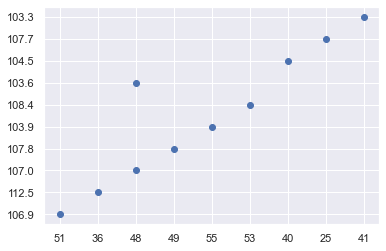

In [28]:
x=just_def_rating_and_season.wins
y=just_def_rating_and_season.def_rtg
plt.scatter(x,y)

Very basic boring plot of wins and def rtg

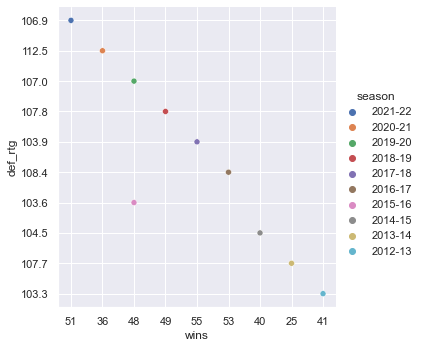

In [29]:
sns.relplot(data=just_def_rating_and_season, x='wins', y='def_rtg', hue='season')     #makes a nice seaborn plot

More in depth seaborn plot. The number of wins are plotted on the x axis and the defensive rating on the y axis corresponds with it.  The hue of the dot is also what season it is.  For example in the 2021-2022 season the Celtics had 55 wins and a defensive rating of 103.9